<a href="https://colab.research.google.com/github/SrithinRaveendran/BmiCAlculator/blob/master/cibil_score_duplicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a=pd.read_excel('/content/drive/MyDrive/Data/External_Cibil_Dataset.xlsx')
b=pd.read_excel('/content/drive/MyDrive/Data/Internal_Bank_Dataset.xlsx')
a

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [ ]:
a.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [ ]:
a.tail()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
51335,51336,74,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,others,others,681,P2


In [ ]:
a.isna().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

In [ ]:
b

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
b.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [ ]:
b.tail()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51331,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,...,0,2,0,0,0,0,2,0,15,8
51335,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,...,0,0,0,0,0,1,0,0,20,20


In [ ]:
b.isna().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [ ]:
a.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [ ]:
b.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

<Axes: >

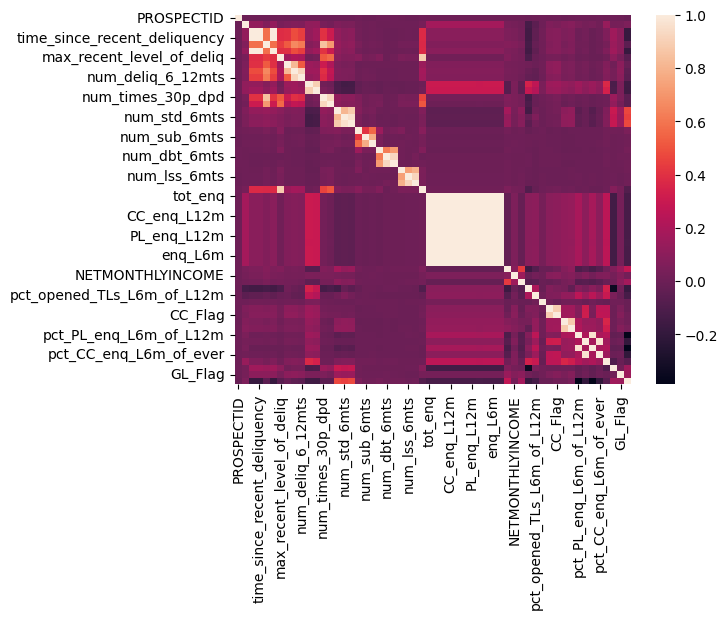

In [ ]:
sns.heatmap(a.corr(numeric_only=True))

<Axes: >

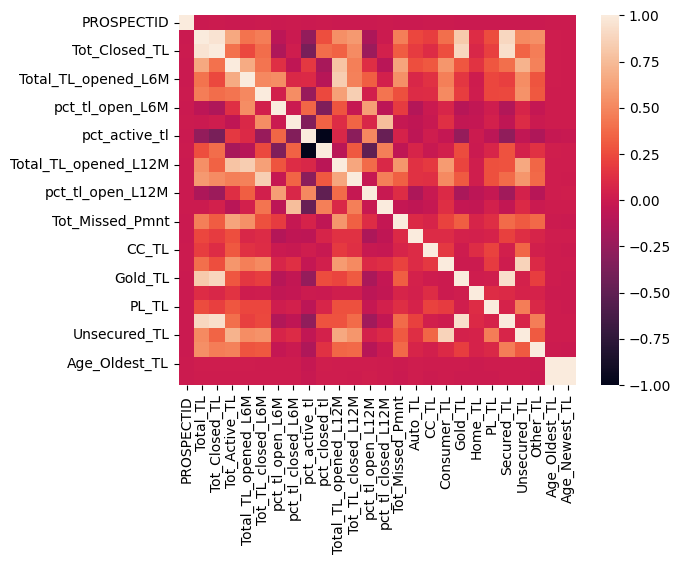

In [ ]:
sns.heatmap(b.corr(numeric_only=True))

In [ ]:
df = pd. merge ( a, b, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )
df

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


<Axes: >

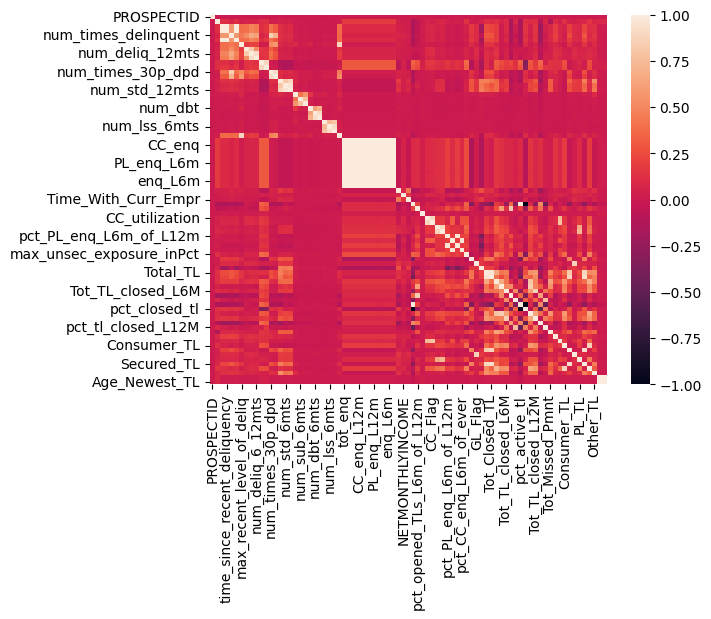

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
# df.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'
# , 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct'],axis=1,inplace=True)
# df

In [ ]:
# d={}
# lst=[]
# for i in df.columns:
#     if df.loc[df[i] == -99999].shape[0]:
#        lst.append(i)
# print(lst)




In [ ]:
# for i in df.columns:
#     if df.loc[df[i] == -99999].shape[0]:
#             d[i]=df.loc[df[i] == -99999].shape[0]
# print(d)



In [ ]:
# df.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'
# , 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct'],axis=1,inplace=True)

In [ ]:
r=(df== -99999).sum().sort_values(ascending=False).head(40)
r



CC_utilization                  47636
PL_utilization                  44435
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
max_delinquency_level           35949
max_unsec_exposure_inPct        23178
max_deliq_6mts                  12890
max_deliq_12mts                 10832
enq_L3m                          6321
tot_enq                          6321
enq_L6m                          6321
enq_L12m                         6321
time_since_recent_enq            6321
PL_enq_L12m                      6321
PL_enq_L6m                       6321
PL_enq                           6321
CC_enq_L12m                      6321
CC_enq_L6m                       6321
CC_enq                           6321
time_since_recent_payment        4291
pct_currentBal_all_TL              72
Age_Newest_TL                      40
Age_Oldest_TL                      40
pct_closed_tl                       0
Total_TL_opened_L6M                 0
HL_Flag                             0
GL_Flag     

In [ ]:
df.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'
, 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct'],axis=1,inplace=True)

In [ ]:
d=(df== -99999).sum().sort_values(ascending=False).head(40)
d

CC_enq                       6321
tot_enq                      6321
enq_L3m                      6321
enq_L6m                      6321
enq_L12m                     6321
time_since_recent_enq        6321
PL_enq_L12m                  6321
PL_enq_L6m                   6321
PL_enq                       6321
CC_enq_L12m                  6321
CC_enq_L6m                   6321
time_since_recent_payment    4291
pct_currentBal_all_TL          72
Age_Newest_TL                  40
Age_Oldest_TL                  40
pct_tl_open_L12M                0
Tot_TL_closed_L12M              0
HL_Flag                         0
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Other_TL                        0
Credit_Score                    0
Approved_Flag                   0
Total_TL                        0
Tot_Closed_TL                   0
Tot_Active_TL                   0
Total_TL_opened_L6M             0
Unsecured_TL                    0
Secured_TL    

In [ ]:

# z=(df == -99999).sum()[start:end]
# z

In [ ]:
# dd=pd.DataFrame(d,index=['count'])
# ff=dd.transpose()
# ff

In [ ]:
df['time_since_recent_payment']=df['time_since_recent_payment'].replace(-99999,df['time_since_recent_payment'].mean())
df['tot_enq']=df['tot_enq'].replace(-99999,df['tot_enq'].mode()[0])
df['CC_enq']=df['CC_enq'].replace(-99999,df['CC_enq'].mode()[0])
df['CC_enq_L6m']=df['CC_enq_L6m'].replace(-99999,df['CC_enq_L6m'].mode()[0])
df['CC_enq_L12m']=df['CC_enq_L12m'].replace(-99999,df['CC_enq_L12m'].mode()[0])
df['PL_enq_L12m']=df['PL_enq_L12m'].replace(-99999,df['PL_enq_L12m'].mode()[0])
df['PL_enq_L6m']=df['PL_enq_L6m'].replace(-99999,df['PL_enq_L6m'].mode()[0])
df['PL_enq']=df['PL_enq'].replace(-99999,df['PL_enq'].mode()[0])
df['enq_L12m']=df['enq_L12m'].replace(-99999,df['enq_L12m'] .mode()[0])
df['enq_L6m']=df['enq_L6m'].replace(-99999,df['enq_L6m'].mode()[0])
df['enq_L3m']=df['enq_L3m'].replace(-99999,df['enq_L3m'].mode()[0])
df['pct_currentBal_all_TL']=df['pct_currentBal_all_TL'].replace(-99999,df['pct_currentBal_all_TL'].mean())
df['Age_Newest_TL']=df['Age_Newest_TL'].replace(-99999,df['Age_Newest_TL'].mode()[0])
df['Age_Oldest_TL']=df['Age_Oldest_TL'].replace(-99999,df['Age_Oldest_TL'].mode()[0])

Text(0.5, 1.0, 'MARITALSTATUS GRAPH')

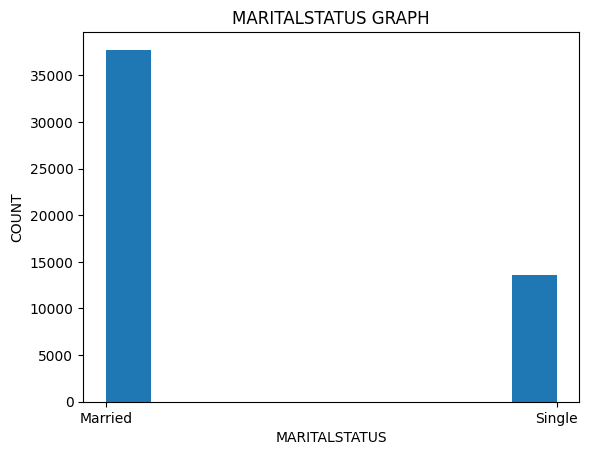

In [ ]:
plt.hist(df['MARITALSTATUS'])
plt.xlabel('MARITALSTATUS')
plt.ylabel('COUNT')
plt.title('MARITALSTATUS GRAPH')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '12TH'),
  Text(1, 0, 'GRADUATE'),
  Text(2, 0, 'SSC'),
  Text(3, 0, 'POST-GRADUATE'),
  Text(4, 0, 'UNDER GRADUATE'),
  Text(5, 0, 'OTHERS'),
  Text(6, 0, 'PROFESSIONAL')])

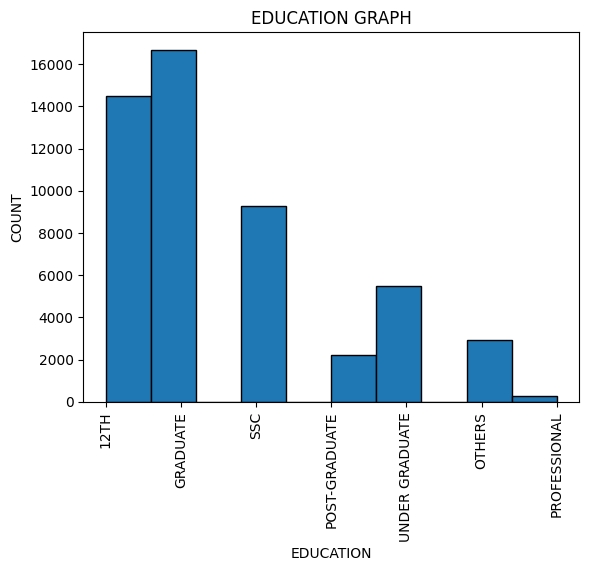

In [ ]:
plt.hist(df['EDUCATION'],edgecolor='black')
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION GRAPH')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'GENDER GRAPH')

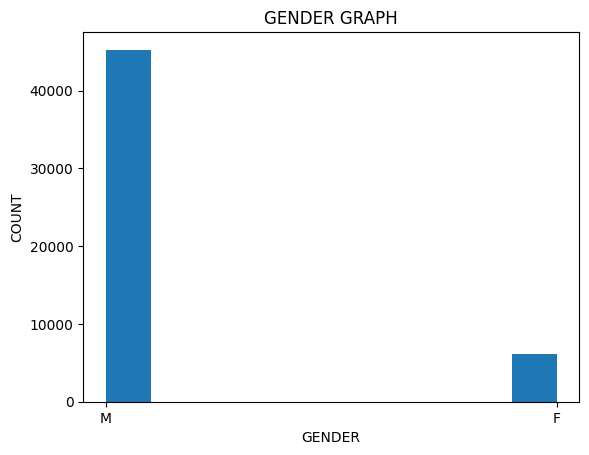

In [ ]:
plt.hist(df['GENDER'])
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.title('GENDER GRAPH')

In [ ]:
def correlation (dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # we are interested in absolute coeff value
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corry=correlation(df,0.8)

print(len(corry))
list(corry)

26


['pct_tl_open_L6M',
 'num_times_60p_dpd',
 'Unsecured_TL',
 'CC_enq_L12m',
 'Tot_Closed_TL',
 'num_lss_12mts',
 'Tot_TL_closed_L12M',
 'enq_L6m',
 'pct_active_tl',
 'num_times_30p_dpd',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'num_std_12mts',
 'Total_TL_opened_L12M',
 'recent_level_of_deliq',
 'enq_L3m',
 'PL_enq_L12m',
 'pct_closed_tl',
 'num_deliq_6_12mts',
 'num_std_6mts',
 'Secured_TL',
 'Gold_TL',
 'Home_TL',
 'num_deliq_12mts',
 'enq_L12m',
 'num_dbt_12mts']

In [ ]:
to_encode=[]
for i in df.columns:
    if df[i].dtype == 'object':
        to_encode.append(i)
to_encode

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in to_encode:
    df[i]=lb.fit_transform(df[i])

In [ ]:
corr_with_cibil_score=df.corr()['Credit_Score']
print(corr_with_cibil_score)

PROSPECTID                  -0.008003
time_since_recent_payment    0.072428
num_times_delinquent        -0.053259
max_recent_level_of_deliq   -0.066512
num_deliq_6mts              -0.014668
                               ...   
Secured_TL                   0.223383
Unsecured_TL                 0.023084
Other_TL                     0.258235
Age_Oldest_TL                0.533459
Age_Newest_TL                0.102542
Name: Credit_Score, Length: 79, dtype: float64


In [ ]:
# encode=pd.get_dummies(df[['MARITALSTATUS', 'EDUCATION', 'GENDER','Approved_Flag','last_prod_enq2','first_prod_enq2']],drop_first=True).astype(int)
# encode

In [ ]:
# df2=pd.concat([df,encode],axis=1)
# df2

In [ ]:
# df2.drop(['MARITALSTATUS', 'EDUCATION', 'GENDER','Approved_Flag','first_prod_enq2','last_prod_enq2'],axis=1,inplace=True)

Text(0, 0.5, 'COUNT')

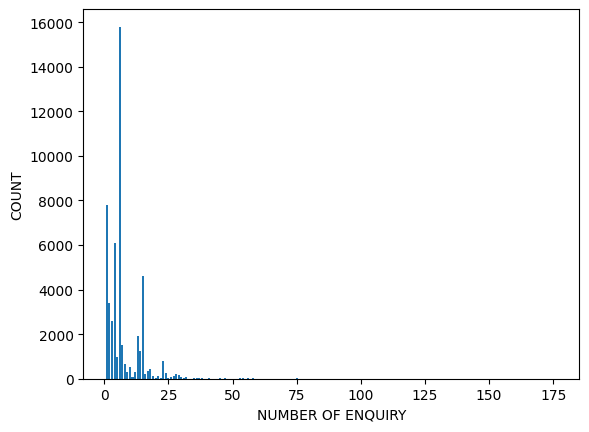

In [ ]:
x=df['tot_enq'].unique()
y=df['tot_enq'].value_counts()
#plt.xticks(range(0,200,25))
plt.bar(x,y)
plt.xlabel('NUMBER OF ENQUIRY')
plt.ylabel('COUNT')

<BarContainer object of 18 artists>

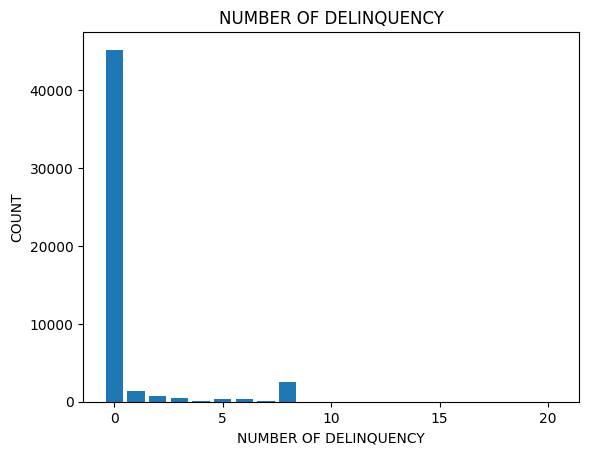

In [ ]:
x=df['num_deliq_6_12mts'].unique()
y=df['num_deliq_6_12mts'].value_counts()
plt.title('NUMBER OF DELINQUENCY')
plt.xlabel('NUMBER OF DELINQUENCY')
plt.ylabel('COUNT')
#plt.xticks(range(0,200,25))
plt.bar(x,y)

In [ ]:
y=df['Credit_Score']
x=df.drop(['Credit_Score'],axis=1)
y

0        696
1        685
2        693
3        673
4        753
        ... 
51331    650
51332    702
51333    661
51334    686
51335    681
Name: Credit_Score, Length: 51336, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
18524,18525,1002.000000,5,31,1,1,0,1,0,50,...,0,0,7,0,0,11,1,4,48,13
40162,40163,-8129.961314,0,0,0,0,0,0,0,0,...,0,0,3,0,0,3,0,0,91,82
23519,23520,64.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
4206,4207,1567.000000,0,0,0,0,0,0,0,29,...,0,0,2,0,0,7,0,5,66,4
32061,32062,1531.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,21244,38.000000,9,90,0,0,0,7,5,17,...,1,0,0,2,0,5,2,3,76,5
45891,45892,417.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,1,17,17
42613,42614,47.000000,1,5,1,1,0,0,0,0,...,0,0,4,0,0,5,0,0,58,10
43567,43568,473.000000,0,0,0,0,0,0,0,6,...,0,0,0,0,1,1,1,0,40,7


In [ ]:
def correlation (dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # we are interested in absolute coeff value
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corrz=correlation(x_train,0.8)

print(len(corrz))
corrz

27


{'Approved_Flag',
 'CC_enq_L12m',
 'Gold_TL',
 'Home_TL',
 'PL_enq_L12m',
 'Secured_TL',
 'Tot_Closed_TL',
 'Tot_TL_closed_L12M',
 'Total_TL_opened_L12M',
 'Unsecured_TL',
 'enq_L12m',
 'enq_L3m',
 'enq_L6m',
 'num_dbt_12mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_lss_12mts',
 'num_std_12mts',
 'num_std_6mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'pct_CC_enq_L6m_of_ever',
 'pct_PL_enq_L6m_of_ever',
 'pct_active_tl',
 'pct_closed_tl',
 'pct_tl_open_L6M',
 'recent_level_of_deliq'}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Text(0.5, 1.0, 'ACTUAL VS PREDICTED')

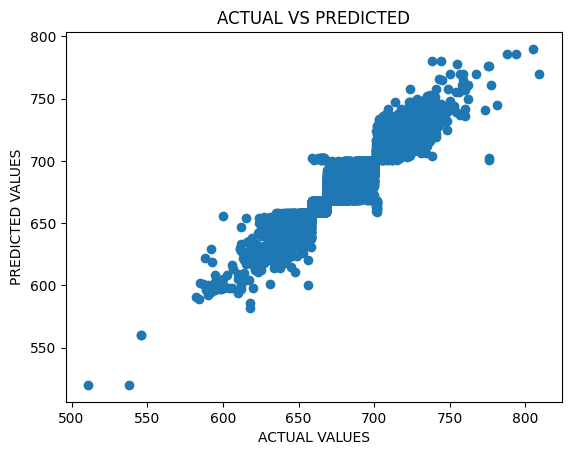

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title('ACTUAL VS PREDICTED')


In [ ]:
z=pd.DataFrame({'predicted_value':y_pred,'acutual':y_test,'difference':y_pred-y_test})
z


,predicted_value,acutual,difference
23980,700.0,683,17.0
3485,676.0,686,-10.0
49508,719.0,718,1.0
1613,689.0,698,-9.0
32771,688.0,673,15.0
...,...,...,...
39309,668.0,663,5.0
28448,653.0,653,0.0
12935,649.0,658,-9.0
16823,687.0,682,5.0


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print(r2_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.8290837308913138
0.009073385108020545


In [ ]:
from sklearn.model_selection import GridSearchCV
model1=DecisionTreeRegressor()
param_grid = {'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
model3.fit(x_train,y_train)
y_pred1=model3.predict(x_test)
y_pred1

array([695.33333333, 686.56666667, 709.66666667, ..., 652.42040816,
       687.95774648, 710.07936508])

In [ ]:
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred1,'Difference':y_test-y_pred1})

,actual_value,predicted_value,Difference
23980,683,695.333333,-12.333333
3485,686,686.566667,-0.566667
49508,718,709.666667,8.333333
1613,698,693.862500,4.137500
32771,673,679.901192,-6.901192
...,...,...,...
39309,663,663.968586,-0.968586
28448,653,652.420408,0.579592
12935,658,652.420408,5.579592
16823,682,687.957746,-5.957746


In [ ]:
r2score=r2_score(y_test,y_pred1)
mean_abs=mean_absolute_percentage_error(y_test,y_pred1)
print('r2_score=',r2score)
print('mean absolute percentage error=',mean_abs)


r2_score= 0.8907172160554409
mean absolute percentage error= 0.007255405282862316
